In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [16]:
X,y = make_classification(n_features=5,n_redundant=0 , n_informative=5 , n_clusters_per_class=1)

In [17]:
df = pd.DataFrame(X,columns=['col1' , 'col2' , 'col3' , 'col4' ,'col5'])
df['target'] = y

In [18]:
df.shape

(100, 6)

In [19]:
df.head()

,col1,col2,col3,col4,col5,target
0,1.010700,1.631806,2.601204,0.656890,1.686335,1
1,-3.192424,2.771968,2.570336,-4.153086,2.748890,1
2,0.982134,1.885158,0.772081,0.693732,0.572329,1
3,0.069731,1.907658,-1.217377,-3.208304,-0.593721,0
4,0.770617,-0.864637,-2.229531,-0.510425,-3.618847,0


In [20]:
# function for row sampling

In [21]:
def sample_rows(df,percent):
    return df.sample(int(percent*df.shape[0]),replace=True)

In [25]:
# function for feature sampling
def sample_features(df,percent):
  cols = df.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df
     

In [26]:

# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
    new_df = sample_rows(df,row_percent)
    return sample_features(new_df,col_percent)
     

In [29]:
df1 = sample_rows(df,0.1)

In [31]:
df2 = sample_rows(df,0.1)

In [32]:
df3 = sample_rows(df,0.1)

In [34]:
df1.shape

(10, 6)

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [37]:
clf1.fit(df1.iloc[:,:-1] , df1.iloc[:,-1])
clf2.fit(df2.iloc[:,:-1] , df2.iloc[:,-1])
clf3.fit(df3.iloc[:,:-1] , df3.iloc[:,-1])

DecisionTreeClassifier()

In [39]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[4] <= 1.143\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.625, 0.5, '  False')]

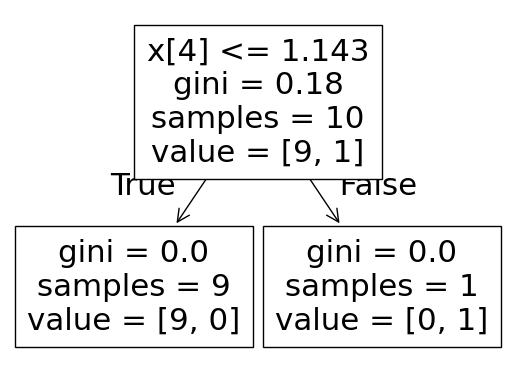

In [40]:
plot_tree(clf1)

[Text(0.5, 0.75, 'x[2] <= -0.44\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.625, 0.5, '  False')]

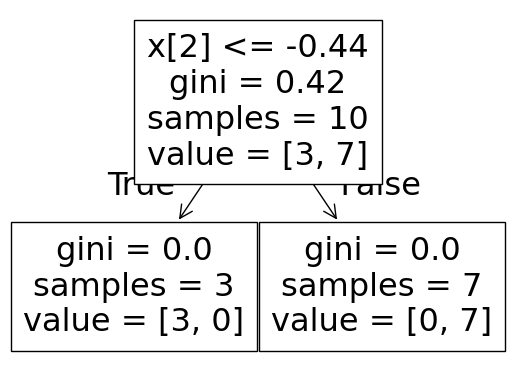

In [41]:
plot_tree(clf2)

[Text(0.5, 0.75, 'x[2] <= -0.586\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.625, 0.5, '  False')]

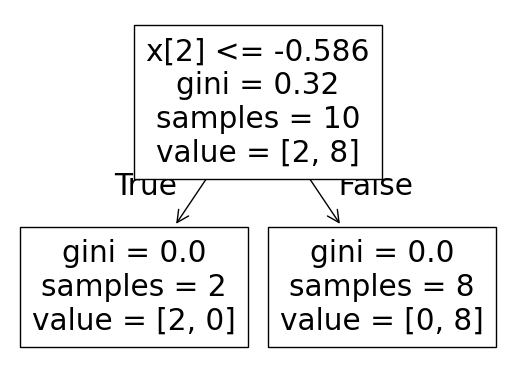

In [42]:
plot_tree(clf3)